In [67]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

Data Set  –  diabetic 

Data Information:-
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Attribute information :-
Pregnancies - Number of times pregnant
Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure - Diastolic blood pressure (mm Hg)
SkinThickness - Triceps skin fold thickness (mm)
Insulin - 2-Hour serum insulin (mu U/ml)
BMI - Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction - Diabetes pedigree function
Age - Age (years)
Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0


In class Assignment Expectations/Steps -

-	Apply Data Cleaning to the Datasets and then apply PCA Find pattern and the choose the number of desired Principal components.
-	Provide the inferences for the above analysis.




In [68]:
df=pd.read_csv('pima-1.data')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [69]:
df = pd.read_csv("pima-1.data",header=None,names=[
    'Pregnancies',
'Glucose', 
'BloodPressure',
'SkinThickness',
'Insulin',
'BMI',
'DiabetesPedigreeFunction', 
'Age',
'Outcome'
])

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:

#split the data and the target
x = df.drop('Outcome', 1)  
y = df['Outcome'] 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
df.shape

(768, 9)

#here we are having 9 columns in which our target column is Outcome

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [75]:
#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [103]:

x = df

x_std = StandardScaler().fit_transform(x)

In [105]:
cov_matrix = np.cov(x_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093  0.22218746]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788  0.46718972]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024  0.06515319]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885  0.07484969]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793  0.13071816]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912  0.29307627]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507  0.17407072]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378  0.23866675]
 [ 0.22218746  0.46718972  0.06515319  0.07484969  0.13071816  0.29307627
  

<Figure size 1440x720 with 0 Axes>

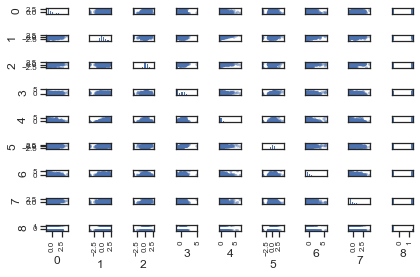

In [111]:
#Understand the data using pair plot
plt.figure(figsize=(20,10))
x_std_df = pd.DataFrame(x_std)
axes = pd.plotting.scatter_matrix(x_std_df)
plt.tight_layout()

In [109]:
#Step 3: Calculate the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [112]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.21599835  0.52744611  0.16451225  0.26505155 -0.54064221  0.07851795
  -0.4567731  -0.16088274  0.21176571]
 [ 0.43675677  0.09563451 -0.39141738  0.58107579  0.02524536 -0.20799965
   0.38274945  0.32712336  0.10877916]
 [ 0.30045538  0.04625339  0.62970532 -0.06830645 -0.16280013  0.32670833
   0.6078671  -0.01105718 -0.05937792]
 [ 0.30729203 -0.44839783  0.29432599  0.39477039  0.43491377  0.28199843
  -0.39795678 -0.07401586  0.1718095 ]
 [ 0.33633235 -0.35534569 -0.14165347 -0.47845101 -0.26883758 -0.08221649
  -0.00873019  0.09763514  0.65037442]
 [ 0.39734198 -0.21031643  0.2519303  -0.12644026 -0.16646311 -0.57252374
  -0.24100789  0.16321892 -0.52745778]
 [ 0.23763447 -0.17519467 -0.2853247   0.04961786 -0.09316407 -0.05719014
   0.17162837 -0.87352658 -0.15655457]
 [ 0.27865556  0.53320237  0.1261179  -0.28875418  0.61489048 -0.29942807
   0.00105491 -0.17111166  0.20428857]
 [ 0.41565279  0.15476805 -0.39461511 -0.31756221  0.06827401  0.58037812
  -0

In [113]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [114]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.13890652  45.85348467  58.30043055  68.09992922  77.48463379
  85.64983646  91.07676313  95.72322015 100.        ]


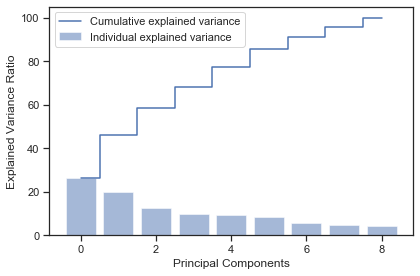

In [119]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

PCA using all features

In [110]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA

#pca = PCA(n_components = 2)
# with all features as input ( 14 features)
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [77]:
# Fitting Logistic Regression To the training set  and predict with test data


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [78]:
# making confusion matrix between 
#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[98  9]
 [18 29]]
Accuracy : 0.8246753246753247


In [79]:
pca.explained_variance_ratio_

array([0.2595475 , 0.22020622, 0.12734819, 0.11057783, 0.09403196,
       0.08720167, 0.0510702 , 0.05001642])

In [80]:
cov_matrix = np.cov(x_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 2.07976723e+00 -2.37620328e-16  0.00000000e+00 -1.24605782e-16
   4.50609280e-16 -6.66496041e-17 -1.84010863e-16  5.79561775e-18]
 [-2.37620328e-16  1.76452357e+00 -9.41787884e-17  2.02846621e-17
   1.30401399e-17 -2.89780887e-17  2.10091143e-16 -3.76715154e-17]
 [ 0.00000000e+00 -9.41787884e-17  1.02044750e+00  1.05588911e-16
  -5.94050819e-17 -7.53430307e-17  1.44890444e-18  3.54981587e-16]
 [-1.24605782e-16  2.02846621e-17  1.05588911e-16  8.86065757e-01
  -1.63726201e-16 -2.08642239e-16  4.34671331e-18 -1.63001749e-16]
 [ 4.50609280e-16  1.30401399e-17 -5.94050819e-17 -1.63726201e-16
   7.53482888e-01 -6.30273430e-16 -2.31824710e-17 -8.11386485e-17]
 [-6.66496041e-17 -2.89780887e-17 -7.53430307e-17 -2.08642239e-16
  -6.30273430e-16  6.98751398e-01  1.30401399e-16  1.44890444e-18]
 [-1.84010863e-16  2.10091143e-16  1.44890444e-18  4.34671331e-18
  -2.31824710e-17  1.30401399e-16  4.09228135e-01  3.62226109e-18]
 [ 5.79561775e-18 -3.76715154e-17  3.54981587e-

In [81]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [82]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 1.00000000e+00  7.53767185e-16 -1.04386050e-16  3.39753147e-16
   4.82612888e-17  1.10150588e-16 -3.45186178e-18 -3.30264218e-32]
 [ 0.00000000e+00  1.00000000e+00  7.18496665e-17  9.57984019e-17
  -2.02661524e-18 -4.01303423e-17  2.13817086e-17 -3.87039227e-17]
 [ 0.00000000e+00 -2.29137407e-16 -1.74504831e-16 -2.51997332e-16
   1.26684516e-16 -1.57011579e-16 -5.07388024e-16 -1.00000000e+00]
 [ 0.00000000e+00 -8.34898112e-17 -1.00000000e+00 -1.40272030e-15
   1.12393307e-15 -7.28339268e-16  3.05543536e-16  2.29586033e-19]
 [ 0.00000000e+00  6.65278079e-16  8.77770078e-16 -1.00000000e+00
   9.27541466e-15 -1.21724968e-15  2.57496584e-16 -2.71414800e-17]
 [ 0.00000000e+00 -1.48012581e-16  1.19578903e-17  9.93717430e-15
   1.00000000e+00 -1.88032676e-16 -5.87687756e-17  2.22154740e-16]
 [ 0.00000000e+00 -3.27860330e-20 -1.05079867e-15 -8.49174447e-16
   3.08620017e-16  1.00000000e+00 -1.67960366e-15 -3.03711880e-16]
 [ 0.00000000e+00 -1.59299715e-17  3.58389590e-16  

In [83]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [84]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.95474989  47.97537183  60.71019096  71.76797413  81.1711706
  89.89133767  94.99835817 100.        ]


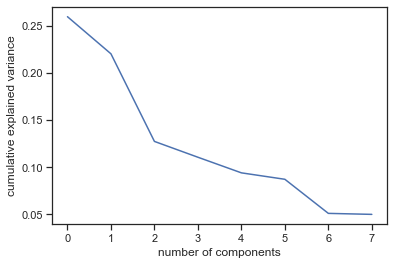

In [85]:
#SCREE PLOT
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [86]:
## PCA using 2 features

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[94 13]
 [24 23]]
Accuracy : 0.7597402597402597


PCA using 3 features

In [88]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## PCA using 3 features

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[93 14]
 [26 21]]
Accuracy : 0.7402597402597403


In [89]:
pca.explained_variance_ratio_

array([0.2595475 , 0.22020622, 0.12734819])

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## PCA using 4 features

pca = PCA(n_components=4)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[94 13]
 [27 20]]
Accuracy : 0.7402597402597403


In [91]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## PCA using 5 features

pca = PCA(n_components=5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[93 14]
 [21 26]]
Accuracy : 0.7727272727272727


In [92]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## PCA using 6 features

pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[98  9]
 [18 29]]
Accuracy : 0.8246753246753247


In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## PCA using 7 features

pca = PCA(n_components=7)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[98  9]
 [18 29]]
Accuracy : 0.8246753246753247


In [94]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## PCA using 8 features

pca = PCA(n_components=8)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[98  9]
 [18 29]]
Accuracy : 0.8246753246753247


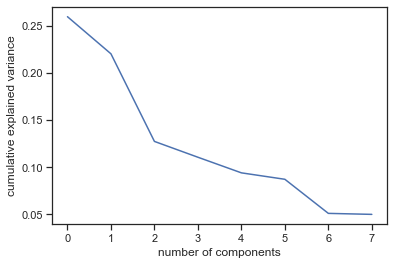

In [95]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

by seeing the above plots 

we can say that the data stoped changing eventhough if we change the number of components as 6, 7, 8 so we are considering pc-6 which is giving th wtotal accuracy of 82%

In [130]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [131]:
import  pandas as pd
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))



      Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
PC-1          1.0  0.000000e+00   0.000000e+00   0.000000e+00 -0.000000e+00   
PC-2         -0.0  1.000000e+00  -2.996484e-16   1.473934e-16 -2.329713e-17   
PC-3         -0.0  1.439041e-16   1.000000e+00  -3.982872e-14  1.945357e-16   
PC-4         -0.0 -1.371110e-16   4.047988e-14   1.000000e+00 -2.499331e-15   
PC-5         -0.0 -3.179214e-16  -3.440392e-17   2.603637e-15  1.000000e+00   
PC-6         -0.0  1.658137e-16  -9.040808e-16   1.512643e-15  9.581118e-15   
PC-7          0.0  2.192423e-16  -4.522997e-17  -2.863386e-16  5.036525e-16   
PC-8         -0.0  3.033485e-17  -2.155382e-16   1.808912e-16  7.515356e-17   

               BMI  DiabetesPedigreeFunction           Age  
PC-1 -0.000000e+00             -0.000000e+00 -0.000000e+00  
PC-2 -1.017688e-16             -2.086415e-16  1.299991e-17  
PC-3  1.160657e-15              2.537647e-16  3.552639e-16  
PC-4 -1.718721e-15              3.497423e-16